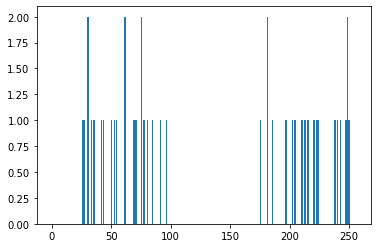

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256])
plt.show()

In [9]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)

A = z[labels==0]
B = z[labels==1]

# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

In [12]:

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

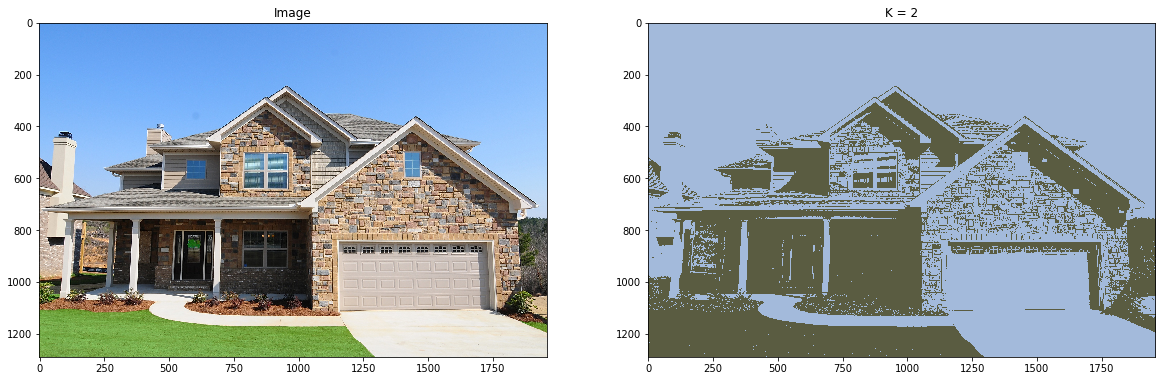

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Images/home.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Image')
ax1.imshow(img)

ax2.set_title("K = 2")
ax2.imshow(res2)

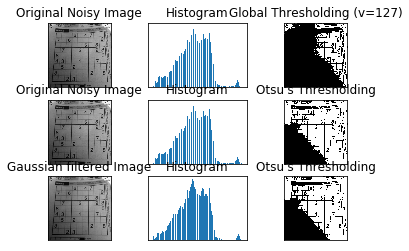

In [46]:
img = cv2.imread('Images/sudoku.png', 0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

# plt.imshow(th3, 'gray')
# plt.show()

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

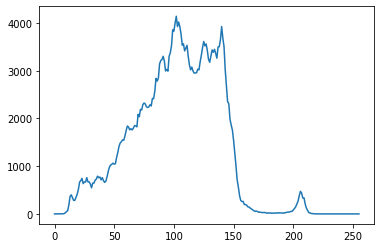

1
Q1 score:
0
Q2 score:
0
2
Q1 score:
0
Q2 score:
0
3
Q1 score:
0
Q2 score:
0
4
Q1 score:
0
Q2 score:
0
5
Q1 score:
0
Q2 score:
0
6
Q1 score:
0
Q2 score:
0
7
Q1 score:
0
Q2 score:
498
8
Q1 score:
2
Q2 score:
1984
9
Q1 score:
10
Q2 score:
5681
10
Q1 score:
33
Q2 score:
11808
11
Q1 score:
81
Q2 score:
16660
12
Q1 score:
149
Q2 score:
45628
13
Q1 score:
336
Q2 score:
88938
14
Q1 score:
702
Q2 score:
96800
15
Q1 score:
1102
Q2 score:
82663
16
Q1 score:
1445
Q2 score:
67920
17
Q1 score:
1728
Q2 score:
68115
18
Q1 score:
2013
Q2 score:
83300
19
Q1 score:
2363
Q2 score:
98118
20
Q1 score:
2777
Q2 score:
122012
21
Q1 score:
3294
Q2 score:
156980
22
Q1 score:
3962
Q2 score:
163332
23
Q1 score:
4660
Q2 score:
173352
24
Q1 score:
5404
Q2 score:
147320
25
Q1 score:
6039
Q2 score:
155001
26
Q1 score:
6710
Q2 score:
153870
27
Q1 score:
7379
Q2 score:
174040
28
Q1 score:
8139
Q2 score:
152760
29
Q1 score:
8809
Q2 score:
152544
30
Q1 score:
9481
Q2 score:
141250
31
Q1 score:
10106
Q2 score:
123075
32


In [59]:
img = cv2.imread('Images/sudoku.png', 0)
# blur = cv2.GaussianBlur(img, (5,5), 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(blur, cmap='gray')

hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)
plt.show()

maxBetween = 0

for t in range(1,256):
    q1=0
    q2=0
    for i in range(1,t):
        q1 = q1 + int(hist[i])
    for j in range(t,256):
        q2 = q2 + int(hist[t])
    print(t)
    print("Q1 score:")
    print(q1)
    print("Q2 score:")
    print(q2)